# PyTorch

## Load the dataset

In [1]:
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer()
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
inputs = cancer.data
inputs.shape

(569, 30)

In [6]:
outputs = cancer.target
outputs.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.25)

In [8]:
X_train.shape

(426, 30)

In [9]:
X_test.shape

(143, 30)

## Data transformation

In [10]:
type(X_train)

numpy.ndarray

In [11]:
import torch

In [12]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [13]:
type(X_train)

torch.Tensor

In [14]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [15]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [16]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural Network

In [17]:
import torch.nn as nn

In [18]:
network = nn.Sequential(nn.Linear(in_features=30, out_features=16),
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())

### Binary crossentrophy as loss function

In [19]:
loss_function = nn.BCELoss()

In [20]:
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
epochs = 100

for epoch in range(epochs):
    running_loss = 0.

    for data in train_loader:
        inputs, outputs = data
        optimizer.zero_grad()

        predictions = network.forward(inputs)
        loss = loss_function(predictions.reshape(-1), outputs)
        loss.backward()

        # step for each batch
        optimizer.step()

        running_loss += loss.item()
    print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(running_loss / len(train_loader)))

Epoch: 1 loss: 0.6495858195216156
Epoch: 2 loss: 0.6371667398962864
Epoch: 3 loss: 0.6260383420212324
Epoch: 4 loss: 0.6115582827911821
Epoch: 5 loss: 0.5964154289212338
Epoch: 6 loss: 0.5754494715568631
Epoch: 7 loss: 0.5551892664543417
Epoch: 8 loss: 0.5206247727538265
Epoch: 9 loss: 0.4934539254321608
Epoch: 10 loss: 0.46132469523784725
Epoch: 11 loss: 0.4189415407735248
Epoch: 12 loss: 0.39381992193155513
Epoch: 13 loss: 0.36702295825924985
Epoch: 14 loss: 0.33759207469086316
Epoch: 15 loss: 0.31756108964598456
Epoch: 16 loss: 0.3193245277155277
Epoch: 17 loss: 0.3049231629038966
Epoch: 18 loss: 0.30335112955681115
Epoch: 19 loss: 0.2711260902673699
Epoch: 20 loss: 0.26761226529298826
Epoch: 21 loss: 0.26735522407431933
Epoch: 22 loss: 0.2623448895160542
Epoch: 23 loss: 0.2650163501154545
Epoch: 24 loss: 0.2766646682176479
Epoch: 25 loss: 0.25649213444354924
Epoch: 26 loss: 0.25219490136518036
Epoch: 27 loss: 0.2580729303664939
Epoch: 28 loss: 0.2621479982206988
Epoch: 29 loss: 0.2

## Evaluate

In [23]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [24]:
X_test.shape

(143, 30)

In [25]:
type(X_test)

numpy.ndarray

In [26]:
X_test = torch.tensor(X_test, dtype=torch.float)

In [27]:
predictions = network.forward(X_test)
predictions

tensor([[0.9910],
        [0.0494],
        [0.9160],
        [0.0187],
        [0.9211],
        [0.0154],
        [0.0408],
        [0.9723],
        [0.9162],
        [0.9622],
        [0.9764],
        [0.9169],
        [0.9446],
        [0.9226],
        [0.0739],
        [0.0154],
        [0.0155],
        [0.9765],
        [0.0154],
        [0.0383],
        [0.9736],
        [0.9160],
        [0.0154],
        [0.9164],
        [0.0534],
        [0.0154],
        [0.9697],
        [0.0154],
        [0.9734],
        [0.9299],
        [0.9764],
        [0.9427],
        [0.0154],
        [0.0642],
        [0.9367],
        [0.9174],
        [0.9170],
        [0.9295],
        [0.9852],
        [0.0154],
        [0.9164],
        [0.0154],
        [0.0674],
        [0.0154],
        [0.9163],
        [0.9641],
        [0.9521],
        [0.2446],
        [0.1162],
        [0.9249],
        [0.0154],
        [0.0164],
        [0.0759],
        [0.9807],
        [0.9922],
        [0

In [28]:
import numpy as np

In [29]:
predictions = np.array(predictions > 0.5)
predictions

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [30]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [31]:
accuracy_score(y_test, predictions)

0.958041958041958

In [32]:
cm = confusion_matrix(y_test, predictions)
cm

array([[52,  6],
       [ 0, 85]])

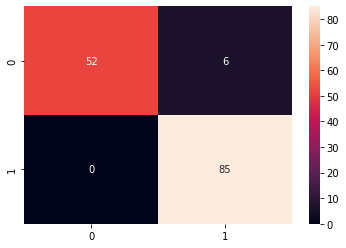

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True)